# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn; seaborn.set(style='white')

# Import Data

In [2]:
df_list = pd.read_csv('sp500_timeperiodpricereturn_output_1-7560.csv')
df_list.head(3)

,start_date,end_date,trading_days,start_price,end_price,price_difference,roi
0,1950-01-03,1950-01-04,1,16.66,16.85,0.19,0.011405
1,1950-01-04,1950-01-05,1,16.85,16.93,0.08,0.004748
2,1950-01-05,1950-01-06,1,16.93,16.98,0.05,0.002953


In [3]:
df_list_summary = pd.read_csv('sp500_timeperiodpricereturn_output_summary_1-7560.csv')
df_list_summary.head(3)

,trading_days,number_of_periods,roi_mean,roi_median,roi_min,roi_max,roi_range,number_of_periods_nonneg,number_of_periods_neg,percent_of_periods_nonneg,percent_of_periods_neg,marginal_nonneg_periods_per_day,cumulative_pos_periods_per_day
0,1,17236,0.000342,0.000468,-0.204669,0.115800,0.320470,9255,7981,0.536958,0.463042,0.000000,0.000000
1,2,17235,0.000686,0.001031,-0.245706,0.149173,0.394879,9420,7815,0.546562,0.453438,0.009605,0.009605
2,3,17234,0.001026,0.001707,-0.263375,0.139480,0.402855,9614,7620,0.557851,0.442149,0.011289,0.020893


# Analysis: Summary Data

In [4]:
df_list_summary.columns

Index(['trading_days', 'number_of_periods', 'roi_mean', 'roi_median',
       'roi_min', 'roi_max', 'roi_range', 'number_of_periods_nonneg',
       'number_of_periods_neg', 'percent_of_periods_nonneg',
       'percent_of_periods_neg', 'marginal_nonneg_periods_per_day',
       'cumulative_pos_periods_per_day'],
      dtype='object')

## % Time Period Price Return is Non-Negative

In [5]:
# summary table by 1-year increments
columns = ['trading_days', 'percent_of_periods_nonneg', 'percent_of_periods_neg', 'cumulative_pos_periods_per_day']
a = df_list_summary[df_list_summary['trading_days'] == 1].loc[:,columns]
b = df_list_summary[df_list_summary['trading_days'] % 252 == 0].loc[:,columns]
c = a.append(b)
c['trading_years'] = c['trading_days'] / 252
c['trading_years'] = c['trading_years'].astype(int)
columns = ['trading_years'] + columns
c = c[columns]
c

,trading_years,trading_days,percent_of_periods_nonneg,percent_of_periods_neg,cumulative_pos_periods_per_day
0,0,1,0.536958,0.463042,0.000000
251,1,252,0.735885,0.264115,0.198927
503,2,504,0.815156,0.184844,0.278198
755,3,756,0.838481,0.161519,0.301523
1007,4,1008,0.824635,0.175365,0.287677
1259,5,1260,0.821055,0.178945,0.284098
1511,6,1512,0.872432,0.127568,0.335475
1763,7,1764,0.911717,0.088283,0.374760
2015,8,2016,0.922607,0.077393,0.385649
2267,9,2268,0.926114,0.073886,0.389156


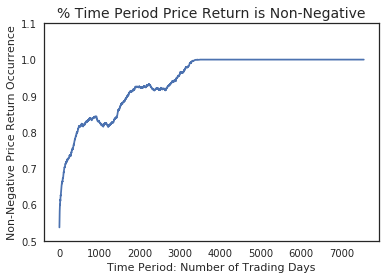

In [6]:
# x = df_list_summary.index
y = df_list_summary['percent_of_periods_nonneg']

plt.plot(y)
plt.ylim((0.50, 1.1))
plt.title("% Time Period Price Return is Non-Negative", size=14)
plt.xlabel("Time Period: Number of Trading Days")
plt.ylabel("Non-Negative Price Return Occurrence");

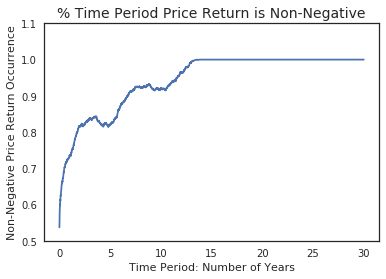

In [7]:
# x = df_list_summary.index
y = df_list_summary['percent_of_periods_nonneg']
x = df_list_summary['trading_days'] / 252

plt.plot(x,y)
plt.ylim((0.50, 1.1))
plt.title("% Time Period Price Return is Non-Negative", size=14)
plt.xlabel("Time Period: Number of Years")
plt.ylabel("Non-Negative Price Return Occurrence");

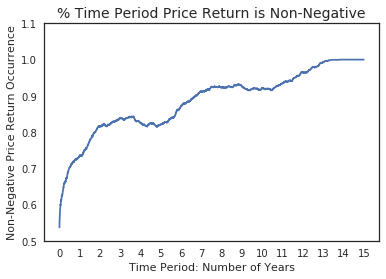

In [8]:
# x = df_list_summary.index
y = df_list_summary['percent_of_periods_nonneg'].iloc[:252*15]
x = df_list_summary['trading_days'].iloc[:252*15] / 252

plt.plot(x,y)
plt.ylim((0.50, 1.1))
plt.xticks(np.arange(0, 16, step=1))
plt.title("% Time Period Price Return is Non-Negative", size=14)
plt.xlabel("Time Period: Number of Years")
plt.ylabel("Non-Negative Price Return Occurrence");

# Analysis: Full Data

## 1-Year Price Returns for Everyday

In [9]:
# plot 1-yr price returns (roi) by day looking out into the future from the start_date
# ex. start_date: 1990-02-01; end_date: 1991-01-31; trading_days: 252; roi: 0.046
  # plotted as x-axis date: 1990-02-01 

mask = ((df_list['start_date'] == '1990-02-01') & (df_list['trading_days'] == 252))

df_list[mask]

,start_date,end_date,trading_days,start_price,end_price,price_difference,roi
4304937,1990-02-01,1991-01-31,252,328.790009,343.929993,15.139984,0.046048


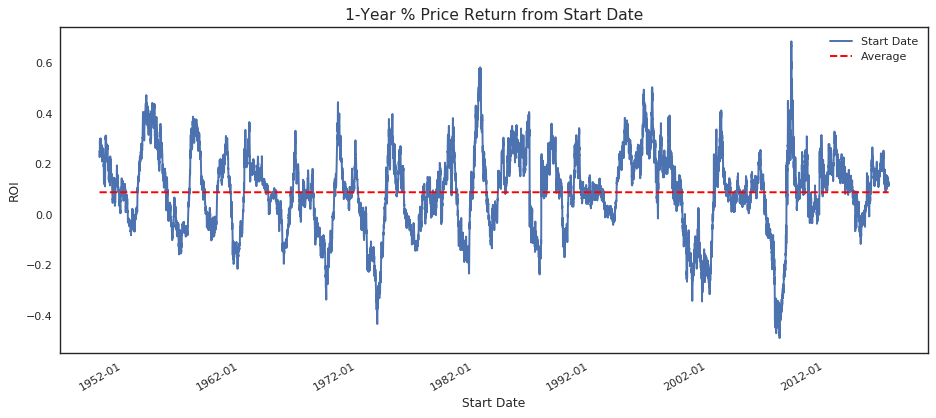

In [10]:
y = df_list[df_list['trading_days'] == 252].loc[:,'roi']
x_list = df_list[df_list['trading_days'] == 252].loc[:,'start_date'].tolist()
x = [datetime.strptime(d,'%Y-%m-%d').date() for d in x_list]

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x, y, label='Start Date')
plt.gcf().autofmt_xdate()

y_mean = [y.mean() for i in y]
plt.plot(x, y_mean, 'r--', label='Average')

plt.title("1-Year % Price Return from Start Date", size=14)
plt.xlabel("Start Date")
plt.ylabel("ROI")
plt.legend();

## Histograms of returns

No handles with labels found to put in legend.


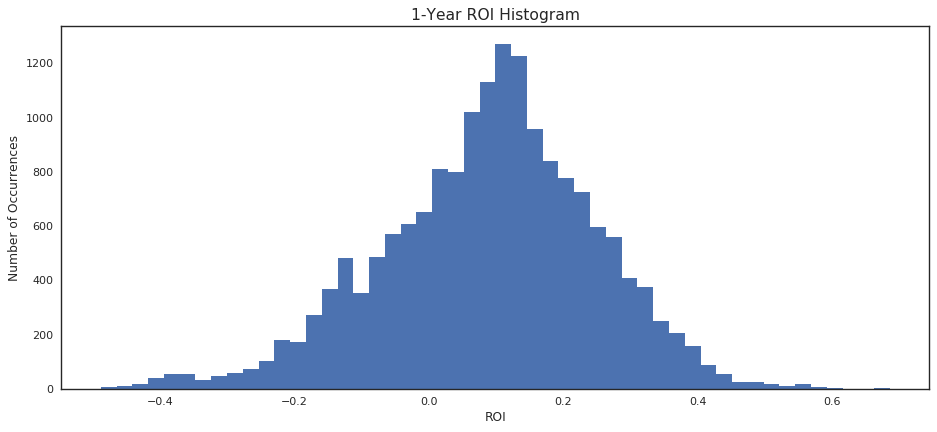

In [14]:
y = df_list[df_list['trading_days'] == 252].loc[:,'roi']

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(y, bins=50)

height = []
plt.plot()

plt.title("1-Year ROI Histogram", size=14)
plt.xlabel("ROI")
plt.ylabel("Number of Occurrences")
plt.legend();